# Tang Quoc Hung - 19521583
Link Github: https://github.com/tangquochung/Data_Mining_Lab/tree/main/Lab4

# Lab 4 - Statistical Data Analytics

## I. Classification

### Load dataset

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits()

### Display a random number to verify the dataset

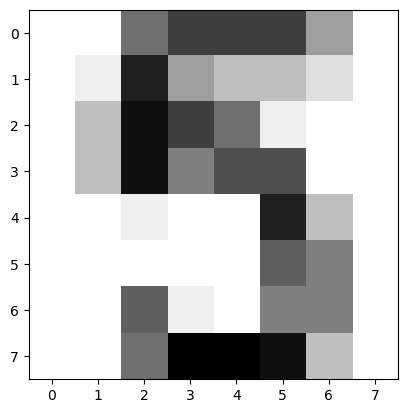

In [2]:
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r,\
           interpolation='nearest')
plt.show()

### Split the dataset into training and testing parts

In [3]:
from sklearn.model_selection import train_test_split
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

### Build KNN classifier 

In [4]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install --upgrade threadpoolctl

Note: you may need to restart the kernel to use updated packages.


In [6]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

print("Accuracy: {0}".format(knn.score(X_test, y_test)))

Accuracy: 0.9861111111111112


### Varying number of neighbors

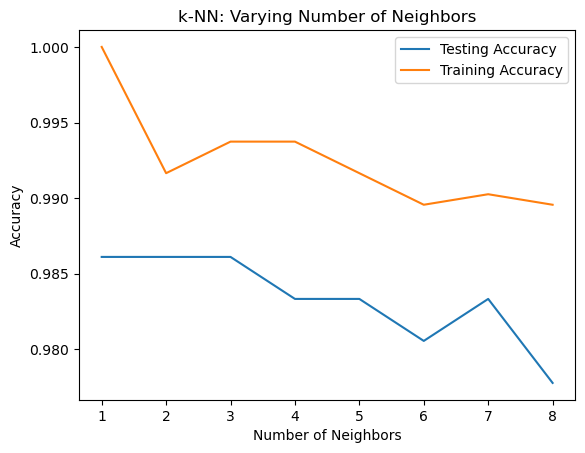

In [7]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    
    #Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    
    test_accuracy[i] = knn.score(X_test, y_test)
    
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

### Classification with deep learning

In [8]:
!pip install torch

In [9]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [10]:
!pip install torchvision

In [11]:
from torchvision import datasets, transforms
mnist = datasets.MNIST(root = '.', train = True,\
                       download = True)

In [12]:
print("Number of training examples", mnist.train_data.shape)
print("Image information", mnist[0])

Number of training examples torch.Size([60000, 28, 28])
Image information (<PIL.Image.Image image mode=L size=28x28 at 0x1AF75105070>, 5)


C:\Users\Asus\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


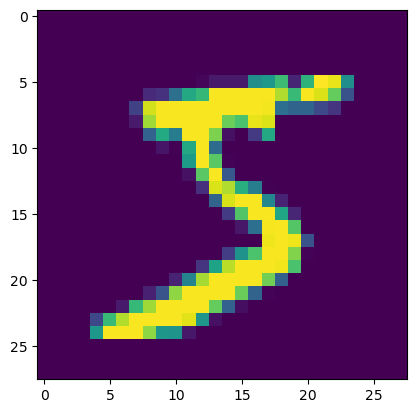

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(mnist[0][0])

In [14]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.fully = nn.Sequential(
            nn.Linear(28*28, 10)
        )
        
    def forward(self, x):
        x = x.view([-1, 28*28])
        x = self.fully(x)
        x = F.log_softmax(x, dim = 1)
        return x

In [15]:
train_loader = torch.utils.data.DataLoader(datasets.MNIST(root = '.', train = True, transform = transforms.Compose([transforms.ToTensor()])),\
                                           batch_size=64, shuffle = True)
test_loader = torch.utils.data.DataLoader(datasets.MNIST(root = '.', train = False, transform = transforms.Compose([transforms.ToTensor()])),\
                                          batch_size=1, shuffle = True)

In [16]:
def train():
    learning_rate = 1e-3
    num_epochs = 3
    
    net = Net()
    optimizer = torch.optim.Adam(net.parameters(), lr = learning_rate)
    
    for epoch in range(num_epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            output = net(data)
            
            loss = F.nll_loss(output, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            if batch_idx % 100 == 0:
                print('Epoch = %f. Batch = %s. Loss = %s' % (epoch, batch_idx, loss.item()))
                
    return net

In [17]:
net = train()

Epoch = 0.000000. Batch = 0. Loss = 2.2830183506011963
Epoch = 0.000000. Batch = 100. Loss = 0.7015300393104553
Epoch = 0.000000. Batch = 200. Loss = 0.5940318703651428
Epoch = 0.000000. Batch = 300. Loss = 0.5105007886886597
Epoch = 0.000000. Batch = 400. Loss = 0.33530178666114807
Epoch = 0.000000. Batch = 500. Loss = 0.4128360152244568
Epoch = 0.000000. Batch = 600. Loss = 0.5867908596992493
Epoch = 0.000000. Batch = 700. Loss = 0.43619465827941895
Epoch = 0.000000. Batch = 800. Loss = 0.44757920503616333
Epoch = 0.000000. Batch = 900. Loss = 0.35941460728645325
Epoch = 1.000000. Batch = 0. Loss = 0.27624353766441345
Epoch = 1.000000. Batch = 100. Loss = 0.44478169083595276
Epoch = 1.000000. Batch = 200. Loss = 0.1643689125776291
Epoch = 1.000000. Batch = 300. Loss = 0.37887081503868103
Epoch = 1.000000. Batch = 400. Loss = 0.21743187308311462
Epoch = 1.000000. Batch = 500. Loss = 0.2660783529281616
Epoch = 1.000000. Batch = 600. Loss = 0.40969905257225037
Epoch = 1.000000. Batch = 

In [18]:
net.eval()
test_loss = 0
correct = 0
total = 0

for data, target in test_loader:
    total += len(target)
    output = net(data)
    pred = output.max(1, keepdim = True)[1]
    correct += target.eq(pred.view_as(target)).sum()
    
print("Correct out of %s" % total, correct.item())
print("Percentage accuracy", correct.item()*100/10000.)

Correct out of 10000 9222
Percentage accuracy 92.22


## II. Linear Regression

### Load the dataset

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('gapminder.csv')

### Use seaborn to visualize the data

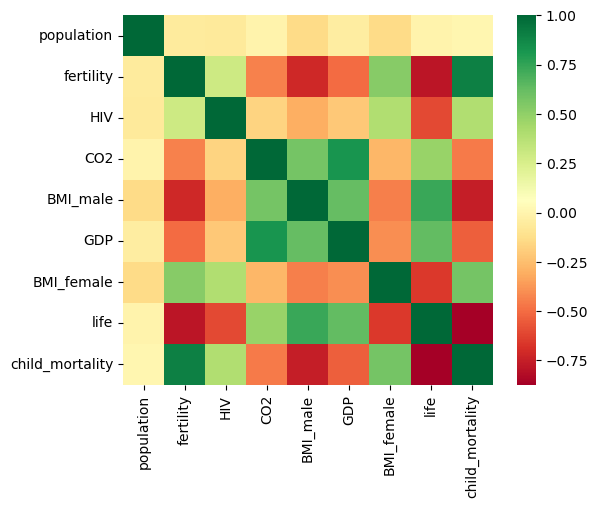

In [20]:
ax = sns.heatmap(df.corr(), square = True, cmap = 'RdYlGn')
plt.show()

### Apply linear regression with the 'fertility' feature to predict life expectancy

0.6162438752151919


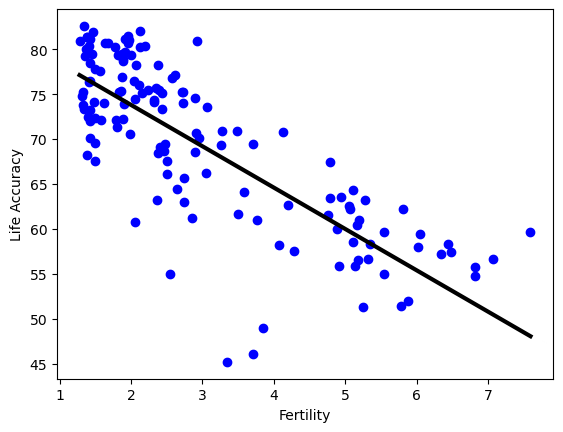

In [21]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

x_fertility = df['fertility'].values.reshape(-1,1)
y_life = df['life'].values.reshape(-1,1)
prediction_space = np.linspace(min(x_fertility), max(x_fertility)).reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x_fertility, y_life, test_size = 0.3, random_state = 42)

# Create the regression model: reg_all
reg = LinearRegression()

# Fit the regression to the training data
reg.fit(x_train, y_train)
y_predict = reg.predict(prediction_space)

# Print accuracy
print(reg.score(x_fertility, y_life))

plt.scatter(x_fertility, y_life, color = 'blue')
plt.plot(prediction_space, y_predict, color = 'black', linewidth = 3)
plt.ylabel('Life Accuracy')
plt.xlabel('Fertility')
plt.show()

### Apply linear regression with the all features to predict life expecntancy. 

In [22]:
features = pd.read_csv('gapminder.csv')
df = pd.read_csv('gapminder.csv')
del features['life']
del features['Region']

y_life = df['life'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(features, y_life,\
                                   test_size=0.3, random_state=42)

reg_all = LinearRegression()
reg_all.fit(x_train, y_train)

print(reg_all.score(features, y_life))

0.8914651485793136


### Linear Regression using Pytorch

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

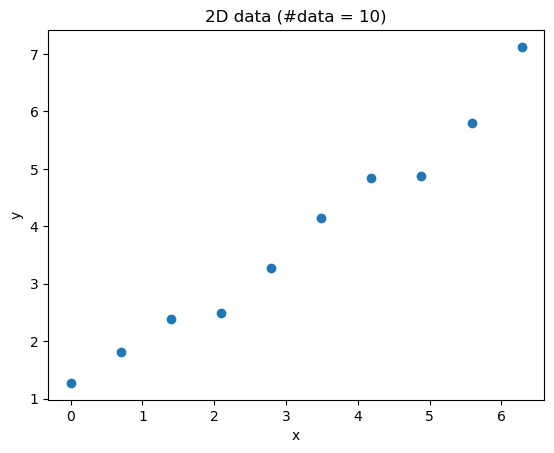

In [24]:
N = 10 # number of data points
m = .9
c = 1
x = np.linspace(0,2*np.pi,N)
y = m*x + c + np.random.normal(0,.3,x.shape)
plt.figure()
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data = %d)' % N)
plt.show()

In [25]:
import torch

### Dataset

In [26]:
from torch.utils.data import Dataset
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        sample = {
            'feature' : torch.tensor([1,self.x[idx]]),
            'label' : torch.tensor([self.y[idx]])}
        return sample

In [27]:
dataset = MyDataset(x, y)
for i in range(len(dataset)):
    sample = dataset[i]
    print(i, sample['feature'], sample['label'])

0 tensor([1., 0.], dtype=torch.float64) tensor([1.2743], dtype=torch.float64)
1 tensor([1.0000, 0.6981], dtype=torch.float64) tensor([1.8115], dtype=torch.float64)
2 tensor([1.0000, 1.3963], dtype=torch.float64) tensor([2.3882], dtype=torch.float64)
3 tensor([1.0000, 2.0944], dtype=torch.float64) tensor([2.4959], dtype=torch.float64)
4 tensor([1.0000, 2.7925], dtype=torch.float64) tensor([3.2691], dtype=torch.float64)
5 tensor([1.0000, 3.4907], dtype=torch.float64) tensor([4.1409], dtype=torch.float64)
6 tensor([1.0000, 4.1888], dtype=torch.float64) tensor([4.8352], dtype=torch.float64)
7 tensor([1.0000, 4.8869], dtype=torch.float64) tensor([4.8698], dtype=torch.float64)
8 tensor([1.0000, 5.5851], dtype=torch.float64) tensor([5.7930], dtype=torch.float64)
9 tensor([1.0000, 6.2832], dtype=torch.float64) tensor([7.1213], dtype=torch.float64)


### Dataloader

In [28]:
pip install --user --upgrade torch torchvision

Note: you may need to restart the kernel to use updated packages.


In [29]:
from torch.utils.data import DataLoader

dataset = MyDataset(x, y)
batch_size = 4
shuffle = True
num_workers = 0
dataloader = DataLoader(dataset, batch_size=batch_size,\
                        shuffle=shuffle, num_workers=num_workers)

In [30]:
import pprint as pp
for i_batch, samples in enumerate(dataloader):
    print('\nbatch# = %s' % i_batch)
    print('samples: ')
    pp.pprint(samples)


batch# = 0
samples: 
{'feature': tensor([[1.0000, 2.7925],
        [1.0000, 1.3963],
        [1.0000, 4.8869],
        [1.0000, 5.5851]], dtype=torch.float64),
 'label': tensor([[3.2691],
        [2.3882],
        [4.8698],
        [5.7930]], dtype=torch.float64)}

batch# = 1
samples: 
{'feature': tensor([[1.0000, 6.2832],
        [1.0000, 2.0944],
        [1.0000, 3.4907],
        [1.0000, 0.0000]], dtype=torch.float64),
 'label': tensor([[7.1213],
        [2.4959],
        [4.1409],
        [1.2743]], dtype=torch.float64)}

batch# = 2
samples: 
{'feature': tensor([[1.0000, 4.1888],
        [1.0000, 0.6981]], dtype=torch.float64),
 'label': tensor([[4.8352],
        [1.8115]], dtype=torch.float64)}


### Model

In [31]:
import torch.nn as nn
import torch.nn.functional as F
class MyModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MyModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

#### Setting a model for our problem

In [32]:
input_dim = 2
output_dim = 1

model = MyModel(input_dim, output_dim)

### Cost function

In [33]:
cost = nn.MSELoss()

### Minimizing the cost function

In [34]:
num_epochs = 10 # How many times the entire training data is seen?
l_rate = 0.01
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate)

dataset = MyDataset(x, y)
batch_size = 4
shuffle = True
num_workers = 0
training_sample_generator = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

for epoch in range(num_epochs):
  print('Epoch = %s' % epoch)
  for batch_i, samples in enumerate(training_sample_generator):
      samples['feature'] = samples['feature'].to(torch.float32)
      predictions = model(samples['feature'])
      samples['label'] = samples['label'].to(torch.float32)
      error = cost(predictions, samples['label'])
      print('\Batch = %s, Error = %s' % (batch_i, error.item()))

      optimiser.zero_grad()

      error.backward()

      optimiser.step()

Epoch = 0
\Batch = 0, Error = 11.57090950012207
\Batch = 1, Error = 3.876490831375122
\Batch = 2, Error = 2.1858768463134766
Epoch = 1
\Batch = 0, Error = 0.483651727437973
\Batch = 1, Error = 1.8955422639846802
\Batch = 2, Error = 0.01612945832312107
Epoch = 2
\Batch = 0, Error = 0.10293995589017868
\Batch = 1, Error = 0.36720967292785645
\Batch = 2, Error = 0.05232592299580574
Epoch = 3
\Batch = 0, Error = 0.1698194146156311
\Batch = 1, Error = 0.10093123465776443
\Batch = 2, Error = 0.00792929157614708
Epoch = 4
\Batch = 0, Error = 0.034662410616874695
\Batch = 1, Error = 0.1597607433795929
\Batch = 2, Error = 0.1186603456735611
Epoch = 5
\Batch = 0, Error = 0.1658376157283783
\Batch = 1, Error = 0.02629723772406578
\Batch = 2, Error = 0.09786126017570496
Epoch = 6
\Batch = 0, Error = 0.023999124765396118
\Batch = 1, Error = 0.15767638385295868
\Batch = 2, Error = 0.11971373856067657
Epoch = 7
\Batch = 0, Error = 0.08851826936006546
\Batch = 1, Error = 0.14507177472114563
\Batch = 2

In [35]:
for epoch in range(num_epochs):
    print('Epoch = %s' % epoch)
    for batch_i, samples in enumerate(training_sample_generator):
        samples['feature'] = samples['feature'].to(torch.float32)
        predictions = model(samples['feature'])
        samples['label'] = samples['label'].to(torch.float32)
        error = cost(predictions, samples['label'])
        print('\nBatch = %s, Error = %s' % (batch_i, error.item()))

        optimiser.zero_grad()
        error.backward()
        optimiser.step()

Epoch = 0

Batch = 0, Error = 0.06723437458276749

Batch = 1, Error = 0.06527378410100937

Batch = 2, Error = 0.2425709366798401
Epoch = 1

Batch = 0, Error = 0.06613191962242126

Batch = 1, Error = 0.15955695509910583

Batch = 2, Error = 0.029193513095378876
Epoch = 2

Batch = 0, Error = 0.10790163278579712

Batch = 1, Error = 0.15698844194412231

Batch = 2, Error = 0.033659275621175766
Epoch = 3

Batch = 0, Error = 0.05479678884148598

Batch = 1, Error = 0.1594451665878296

Batch = 2, Error = 0.019573012366890907
Epoch = 4

Batch = 0, Error = 0.06795866787433624

Batch = 1, Error = 0.054100409150123596

Batch = 2, Error = 0.2585131824016571
Epoch = 5

Batch = 0, Error = 0.061084166169166565

Batch = 1, Error = 0.13099147379398346

Batch = 2, Error = 0.12591110169887543
Epoch = 6

Batch = 0, Error = 0.05765175819396973

Batch = 1, Error = 0.0590946190059185

Batch = 2, Error = 0.2545556426048279
Epoch = 7

Batch = 0, Error = 0.13271038234233856

Batch = 1, Error = 0.039528775960206985

#### Check how well the model has learnt the data

In [36]:
x_for_plotting = np.linspace(0, 2*np.pi, 1000)
design_matrix = torch.tensor(np.vstack([np.ones(x_for_plotting.shape), x_for_plotting]).T, dtype=torch.float32)
print('Design matrix shape:', design_matrix.shape)

y_for_plotting = model.forward(design_matrix)
print('y_for_plotting shape:', y_for_plotting.shape)

Design matrix shape: torch.Size([1000, 2])
y_for_plotting shape: torch.Size([1000, 1])


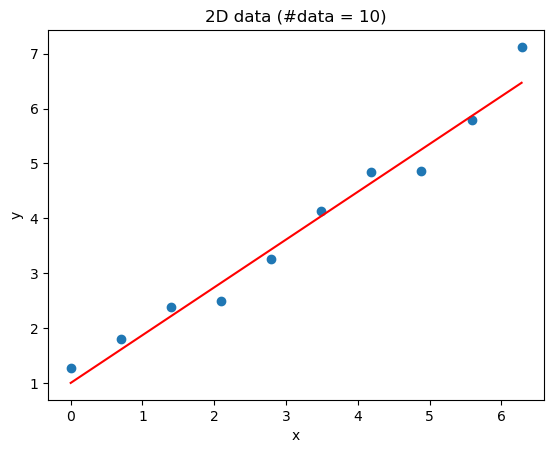

In [37]:
plt.figure()
plt.plot(x, y, 'o')
plt.plot(x_for_plotting, y_for_plotting.data.numpy(), 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data = %d)' % N)
plt.show()

## IV. Exercises

### 1. Classification

#### Load iris dataset from scikit-learn

In [38]:
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()

#### Classify using kNN with different k and simple neural network as described in Classification section

In [39]:
from sklearn.model_selection import train_test_split
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [40]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np

neighbors = np.arange(1, 9)

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    print("Accuracy: {0} with k = {1}".format(knn.score(X_test, y_test), knn.n_neighbors))

Accuracy: 0.9666666666666667 with k = 1
Accuracy: 0.9333333333333333 with k = 2
Accuracy: 1.0 with k = 3
Accuracy: 1.0 with k = 4
Accuracy: 1.0 with k = 5
Accuracy: 0.9666666666666667 with k = 6
Accuracy: 0.9666666666666667 with k = 7
Accuracy: 0.9666666666666667 with k = 8


In [41]:
!pip install tensorflow

  Using cached numpy-1.23.5-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Asus\\anaconda3\\Lib\\site-packages\\~~mpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



In [42]:
!pip install numpy --upgrade

  Using cached numpy-1.24.3-cp39-cp39-win_amd64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
tensorflow-intel 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.3 which is incompatible.


In [43]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

In [44]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [45]:
# Define the neural network architecture
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X, pd.get_dummies(y), epochs=50, batch_size=10)

# Draw the neural network architecture
plot_model(model, to_file='neural_network.png', show_shapes=True, show_layer_names=True)

Epoch 1/50
15/15 [==============================] - 0s 1ms/step - loss: 2.5564 - accuracy: 0.1400
Epoch 2/50
15/15 [==============================] - 0s 1ms/step - loss: 2.2159 - accuracy: 0.2400
Epoch 3/50
15/15 [==============================] - 0s 1ms/step - loss: 1.9540 - accuracy: 0.3000
Epoch 4/50
15/15 [==============================] - 0s 2ms/step - loss: 1.7249 - accuracy: 0.3000
Epoch 5/50
15/15 [==============================] - 0s 926us/step - loss: 1.5582 - accuracy: 0.3000
Epoch 6/50
15/15 [==============================] - 0s 997us/step - loss: 1.4249 - accuracy: 0.3133
Epoch 7/50
15/15 [==============================] - 0s 926us/step - loss: 1.3287 - accuracy: 0.3267
Epoch 8/50
15/15 [==============================] - 0s 1ms/step - loss: 1.2424 - accuracy: 0.3400
Epoch 9/50
15/15 [==============================] - 0s 1ms/step - loss: 1.1697 - accuracy: 0.3400
Epoch 10/50
15/15 [==============================] - 0s 1ms/step - loss: 1.0997 - accuracy: 0.3467
Epoch 11/50
1

#### Compare the accuracy of the classifier in the plot

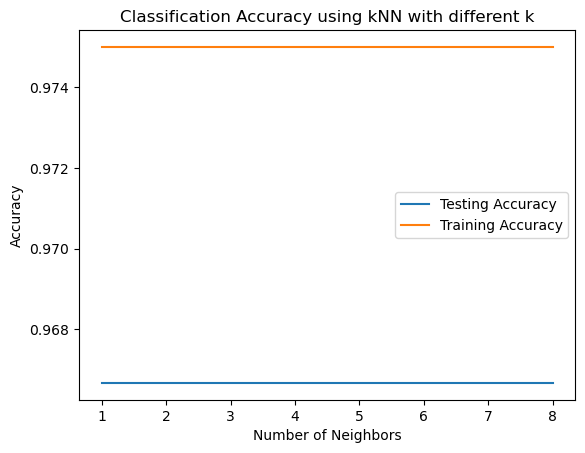

In [46]:
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('Classification Accuracy using kNN with different k')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

#### Classify using deep learning with CNN

### 2. Recommendation Systems

In [47]:
import pandas as pd

In [48]:
movies_df = pd.read_csv('movies.csv', encoding='latin1')
users_df = pd.read_csv('users.csv', encoding='latin1')
ratings_df = pd.read_csv('ratings.csv', encoding='latin1')

In [49]:
movies_df

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
95,96,In the Bleak Midwinter (1995),Comedy
96,97,Hate (Haine,NaN
97,98,Shopping (1994),Action|Thriller
98,99,Heidi Fleiss: Hollywood Madam (1995),Documentary


#### a. Content-Based Recommendation Model

##### Find list of used genres which is used to category the movies

##### Vectorize the relationship between movies and genres and put them into Ij

##### Vectorize the relationship between users and genres and put them into Uj (if user rate for a movie, he/she has the related history with the movies’genres).

##### Compute the cosine_similarity between movies and users. Hint: you can use sklearn.metrics.pairwise and cosine_similarity for quick calculation.

#### b. Collaborative Filtering Recommendation Model by Users

##### Use train_test_split to split above dataset with the ratio 50/50. The test dataset will be used as groundtruth to evaluate the rating calculated by using the train dataset
❖ Create matrix for users, movies and ratings in both training and testing datasets. Hint: train_data_matrix = train_data.pivot_table(index='user_id', columns='movie_id',
values='rating').astype('float64')
test_data_matrix = test_data.pivot_table(index='user_id', columns='movie_id', values='rating').astype('float64')
❖ Calculate the user correlation. Hint: you can reference help_function.txt for some necessary functions, but you can write the function by yourself. The similarity between item and itself should be 0 to not affect the result.
❖ Implement a predict based on user correlation coefficient.
❖ Predict on train dataset and compare the RMSE with the test dataset.
c. Collaborative Filtering Recommendation Model by Items.
❖ Calculate the item correlation
❖ Implement function to predict ratings based on Item Similarity.
❖ Predict on train dataset and compare the RMSE with the test dataset.
❖ Compare the results between User-based and Item-based. Make conclusion.

In [50]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
movies = pd.read_csv('movies.csv', encoding='latin1')
users = pd.read_csv('users.csv', encoding='latin1')
ratings = pd.read_csv('ratings.csv', encoding='latin1')

# Merge the datasets to create the user-item rating matrix
data = pd.merge(pd.merge(ratings, users), movies)

# Create user-item matrix
user_item_matrix = data.pivot_table(index='user_id', columns='movie_id', values='rating').fillna(0)

# Calculate item-item cosine similarity matrix
item_similarity = cosine_similarity(user_item_matrix.T)

# Collaborative Filtering Recommendation Model by Users
def predict_user_cf(user_id, movie_id):
    user_ratings = user_item_matrix.loc[user_id].values
    if movie_id in user_item_matrix.columns:
        movie_index = user_item_matrix.columns.get_loc(movie_id)
        similarities = item_similarity[movie_index]
        relevant_indices = np.where(user_ratings != 0)[0]
        similarities = similarities[relevant_indices]
        ratings = user_ratings[relevant_indices]
        if np.sum(np.abs(similarities)) > 0:
            predicted_rating = np.dot(similarities, ratings) / np.sum(np.abs(similarities))
        else:
            predicted_rating = 0
    else:
        predicted_rating = 0
    return predicted_rating

# Predict on train dataset and calculate RMSE
train_data = data.sample(frac=0.8, random_state=42)  # Use 80% of the data for training
train_predictions = np.array([predict_user_cf(user_id, movie_id) for (user_id, movie_id) in train_data[['user_id', 'movie_id']].to_numpy()])
train_rmse = np.sqrt(mean_squared_error(train_data['rating'], train_predictions))

# Collaborative Filtering Recommendation Model by Items
def predict_item_cf(user_id, movie_id):
    user_ratings = user_item_matrix.loc[user_id].values
    if movie_id in user_item_matrix.columns:
        movie_index = user_item_matrix.columns.get_loc(movie_id)
        similarities = item_similarity[movie_index]
        relevant_indices = np.where(user_ratings != 0)[0]
        similarities = similarities[relevant_indices]
        ratings = user_ratings[relevant_indices]
        if np.sum(np.abs(similarities)) > 0:
            predicted_rating = np.dot(similarities, ratings) / np.sum(np.abs(similarities))
        else:
            predicted_rating = 0
    else:
        predicted_rating = 0
    return predicted_rating

# Predict on test dataset and calculate RMSE
test_data = data.drop(train_data.index)  # Use the remaining 20% of the data for testing
test_predictions = np.array([predict_item_cf(user_id, movie_id) for (user_id, movie_id) in test_data[['user_id', 'movie_id']].to_numpy()])
test_rmse = np.sqrt(mean_squared_error(test_data['rating'], test_predictions))

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


Train RMSE: 1.128007913704691
Test RMSE: 1.1240651349875521
